In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
hr = pd.read_csv('../data/heart_rate.txt',header=None)
hr['heart_rate'] = hr[0]
hr.drop(columns=[0],inplace=True)
hr['time'] = hr.index * 1e-3
hr.head()

,heart_rate,time
0,0.0,0.000
1,0.0,0.001
2,0.0,0.002
3,0.0,0.003
4,0.0,0.004


Text(0.5, 1.0, 'Heart Rate vs Time for realtime ECG data')

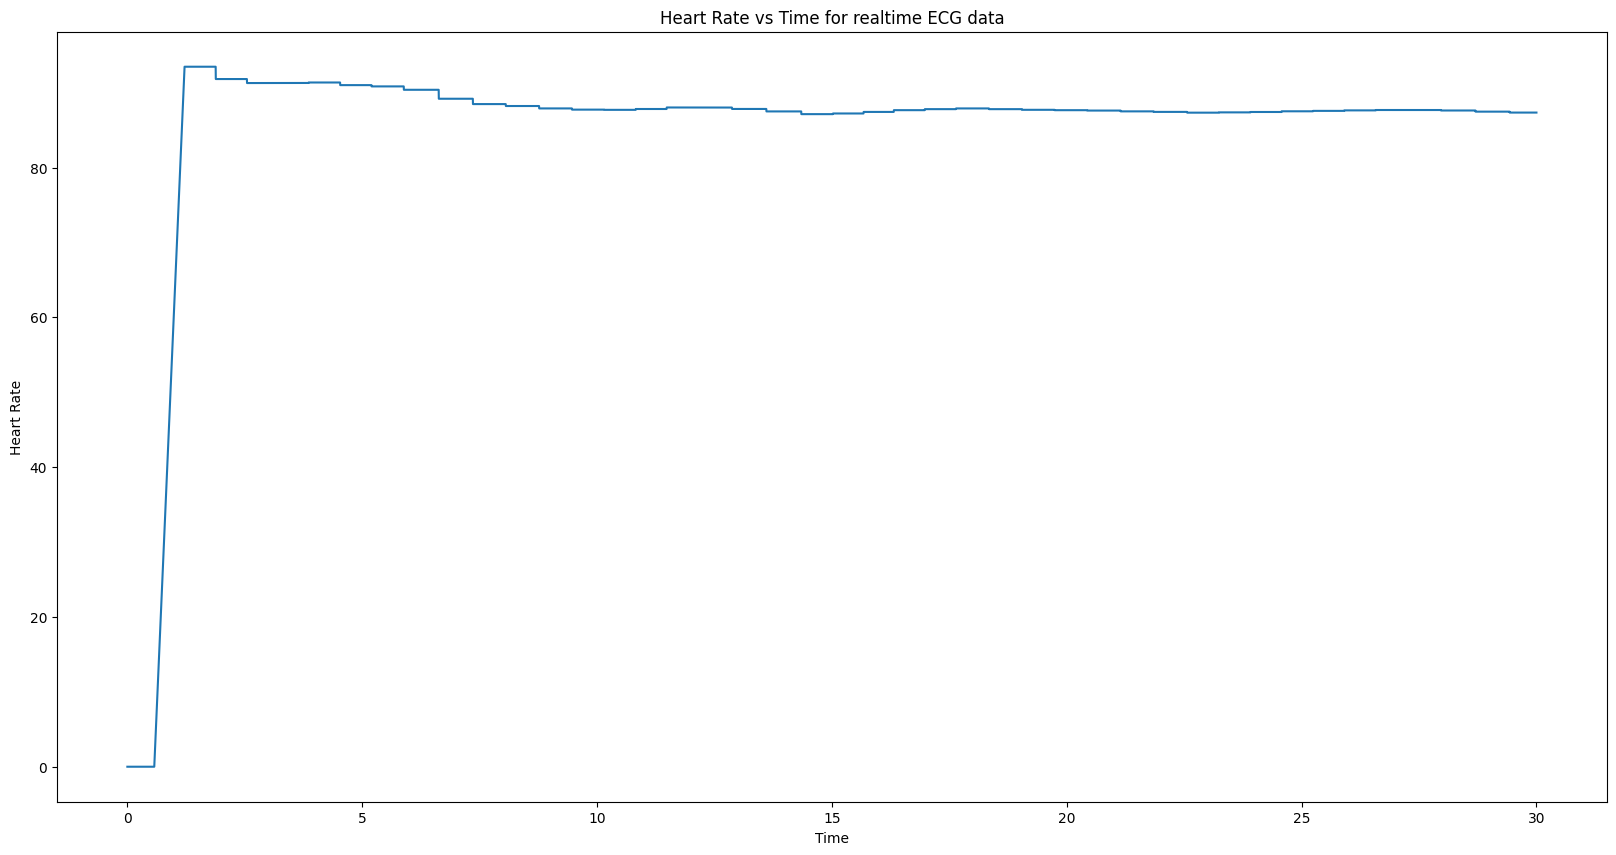

In [14]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='time', y='heart_rate', data=hr)
plt.xlabel('Time')
plt.ylabel('Heart Rate')
plt.title('Heart Rate vs Time for realtime ECG data')

In [16]:
ecg = pd.read_csv('../data/ecg_processed.txt',sep= ' ', header=None)
ecg.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.072360e-07,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,-4.072360e-07,-1.928510e-06,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,-4.072360e-07,-1.928510e-06,-1.128510e-07,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000e+00,-4.072360e-07,-1.928510e-06,-1.128510e-07,2.679790e-05,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-4.072360e-07,-1.928510e-06,-1.128510e-07,2.679790e-05,1.286250e-04,NaN


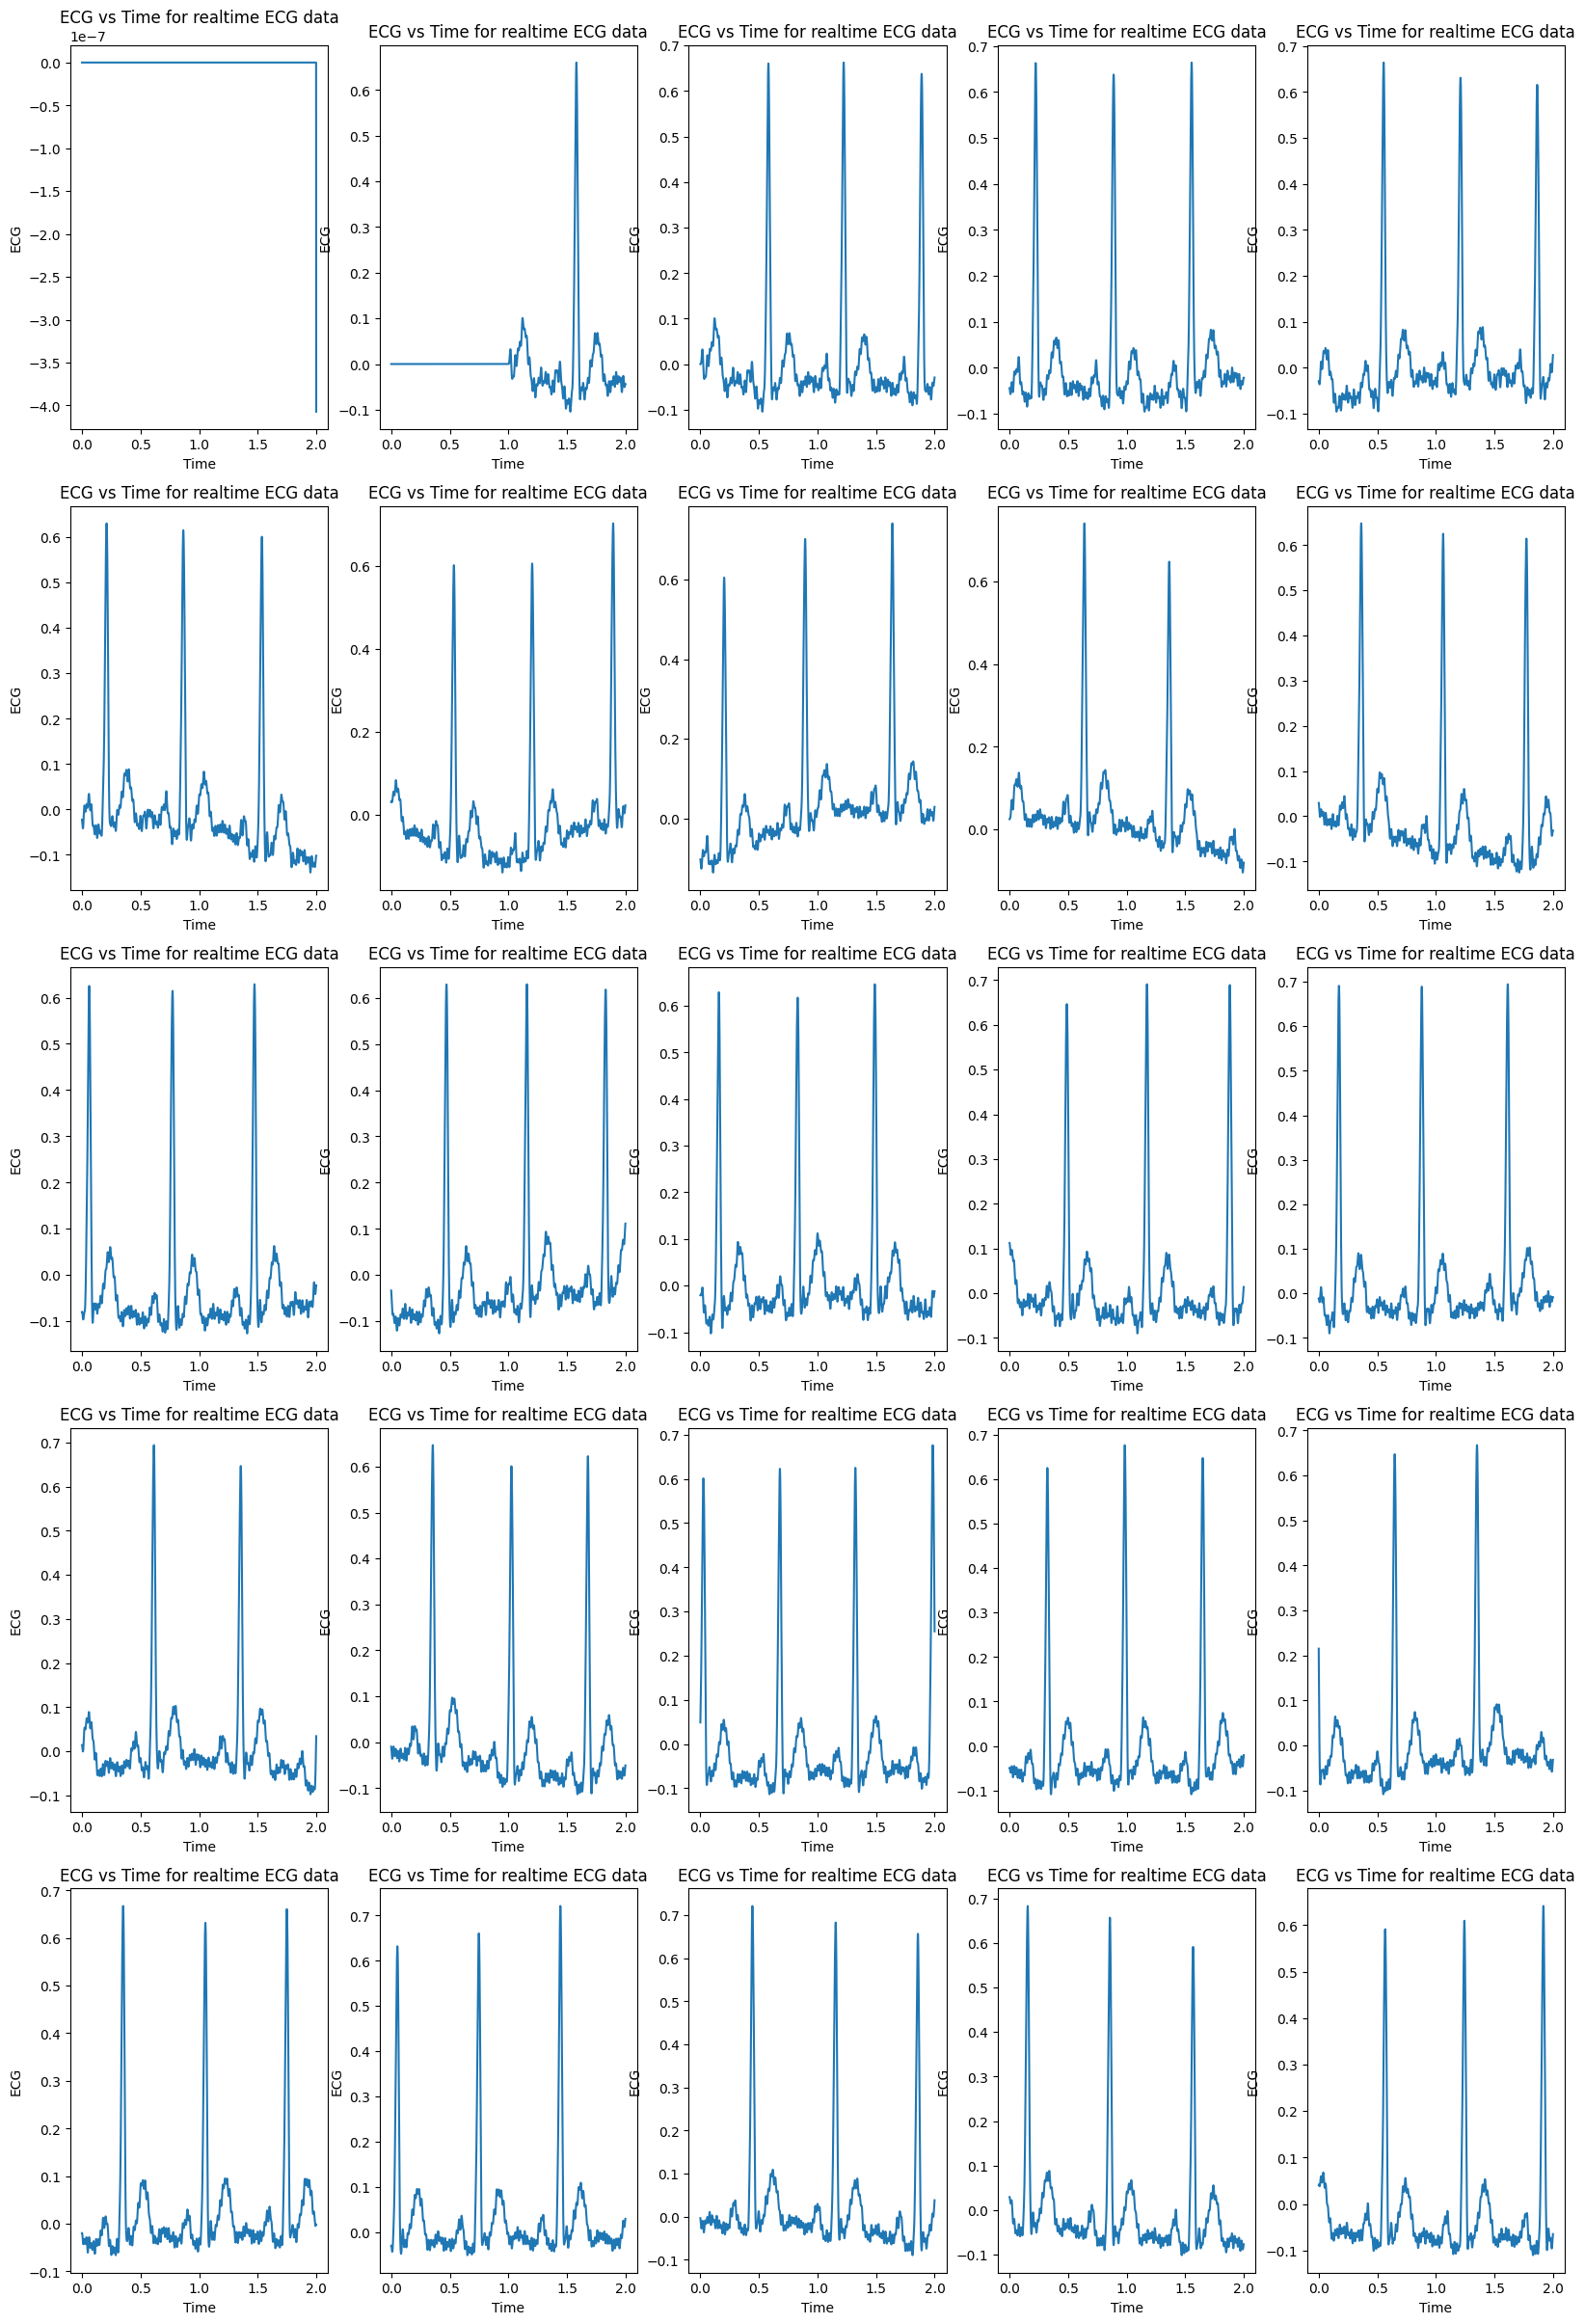

In [47]:
times = ecg.columns.to_list()
times = [float(i)/1e3 for i in times]

def plot_ecg(i):
    plt.plot(times,ecg.iloc[int(i)].values)

plt.figure(figsize=(20, 30))
for i in range(1, 26):
    plt.subplot(5, 5, i)
    plot_ecg((i-1)*1000)
    plt.xlabel('Time')
    plt.ylabel('ECG')
    plt.title('ECG vs Time for realtime ECG data')

In [7]:
adam_ecg = pd.read_csv('adam_ecg_data_4096.csv',header=None)
adam_ecg['time (s)'] = adam_ecg.index / 860
adam_ecg['ecg raw'] = adam_ecg[1]
adam_ecg['ecg filtered'] = adam_ecg[3]
adam_ecg.drop(columns=[0,1,2,3],inplace=True)

adam_ecg.head()

,time (s),ecg raw,ecg filtered
0,0.000000,3.15810,0.025319
1,0.001163,3.15235,0.179019
2,0.002326,3.14285,0.601640
3,0.003488,3.12710,1.309700
4,0.004651,3.10309,2.127260


Text(0.5, 1.0, 'Filtered ECG vs Time for Adam ECG data')

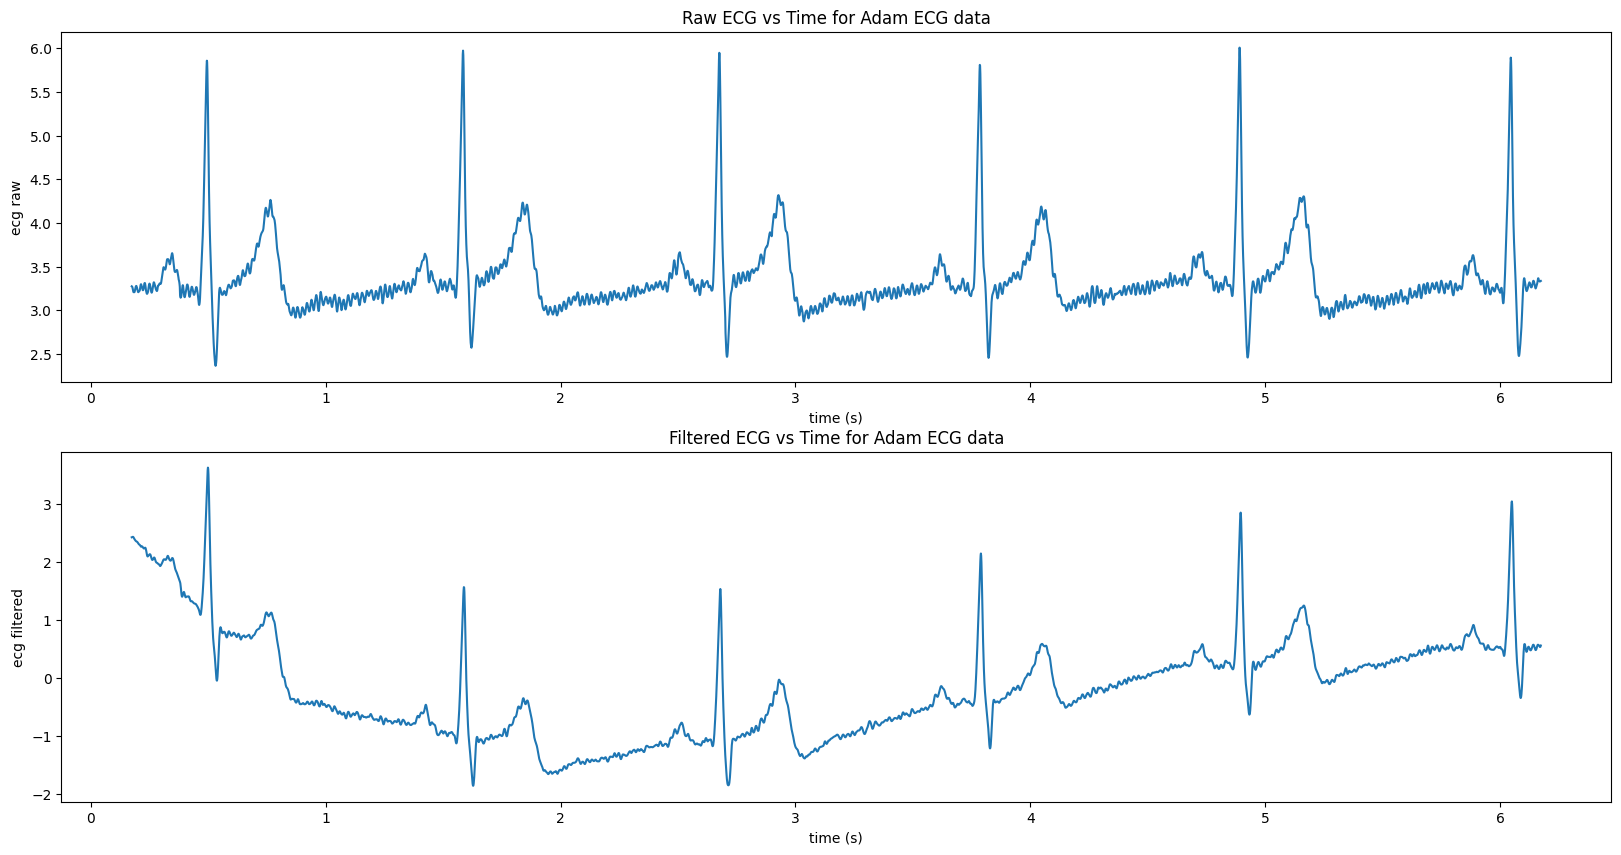

In [25]:
window = int(860 * 6)
start = 150

plt.figure(figsize=(20, 10))
plt.subplot(2,1,1)
sns.lineplot(x='time (s)', y='ecg raw', data=adam_ecg[start:start+window])
plt.title('Raw ECG vs Time for Adam ECG data')
plt.subplot(2,1,2)
sns.lineplot(x='time (s)', y='ecg filtered', data=adam_ecg[start:start+window])
plt.title('Filtered ECG vs Time for Adam ECG data')